# Malarial Diagnosis

We will give the blood report and it will detect whether it has malaria or not(Parasited or Uninfected)

We will be dealing with image data throughout.
And as it is the problem and we have to say whether it is a parasited or not, so it is
## **binary classification problem**

**1 : Uninfected
0 : Parasited**




## About Dataset

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.
[Check out dataset by clicking here](https://www.tensorflow.org/datasets/catalog/malaria)

Feature Description :
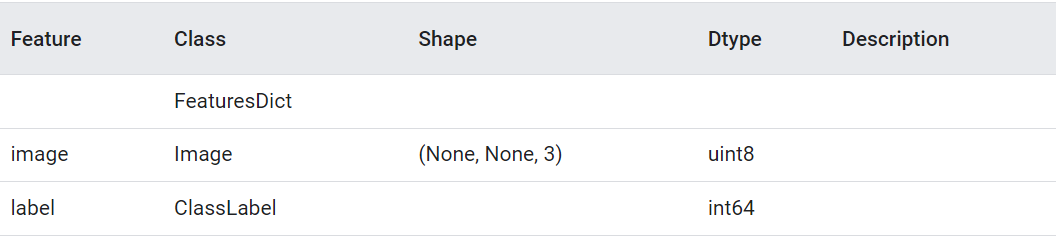

In [2]:
#Importing essential libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.models import Model
from keras.layers import Layer
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision,Recall

In [3]:
dataset, dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

In [ ]:
for data in dataset[0].take(1):
  print(data)

# **DATA PREPARATION**

More info on [CNN Explainer](https://poloclub.github.io/cnn-explainer/)


In [5]:
def split_dataset(dataset, trainr, valr, testr):
  dataset_size = len(dataset)

  train_dataset = dataset.take(int(trainr*dataset_size))

  val_test_dataset = dataset.skip(int(trainr*dataset_size))
  val_dataset = val_test_dataset.take(int(valr*dataset_size))

  test_dataset = val_test_dataset.skip(int(valr*dataset_size))
  return train_dataset, val_dataset, test_dataset

In [6]:
trainr = 0.8
valr = 0.1
testr = 0.1

train_dataset, val_dataset, test_dataset = split_dataset(dataset[0], trainr, valr, testr )

# **DATA VISUALISATION**

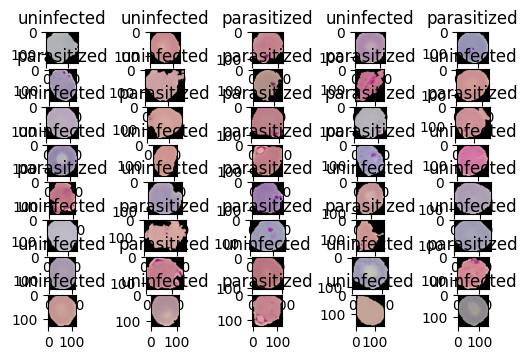

In [7]:
for i,(image,label) in enumerate(train_dataset.take(40)):
  axi = plt.subplot(10,5,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

In [ ]:
dataset_info.features['label'].int2str(1) #To check 1 is for uninfected or parasited

# **DATA PREPROCESSING**

In [9]:
IMG_SIZE = 224
def image_modify(image,label):
  return tf.image.resize(image,(IMG_SIZE,IMG_SIZE))/255.0,label

In [ ]:
train_dataset = train_dataset.map(image_modify)
val_dataset = val_dataset.map(image_modify)
test_dataset = test_dataset.map(image_modify)


train_dataset
test_dataset
val_dataset

In [ ]:
for image,label in train_dataset.take(1):
  print(image,label)

In [ ]:
from os import terminal_size
train_dataset = train_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset
test_dataset
val_dataset

# **MODEL CREATION AND TRAINING**

In [ ]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IMG_SIZE,IMG_SIZE,3)),
    Conv2D(filters=6,kernel_size = 3,strides = 1,padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides=2),

    Conv2D(filters=16,kernel_size = 3,strides = 1,padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides=2),

    Flatten(),

    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(10,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')

])

lenet_model.summary()

In [ ]:
y_true = [0,1,0,0]
y_predict = [0.6,0.51,0.94,1]
bcross = tf.keras.losses.BinaryCrossentropy(from_logits = True)
bcross(y_true,y_predict)

In [17]:
lenet_model.compile(optimizer = Adam(learning_rate = 0.01),loss=BinaryCrossentropy(),metrics='accuracy')

In [ ]:
history = lenet_model.fit(train_dataset,validation_data = val_dataset,epochs = 20,verbose = 1)

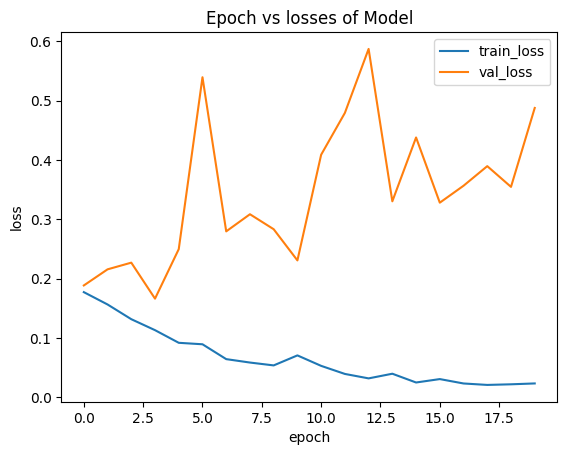

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Epoch vs losses of Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

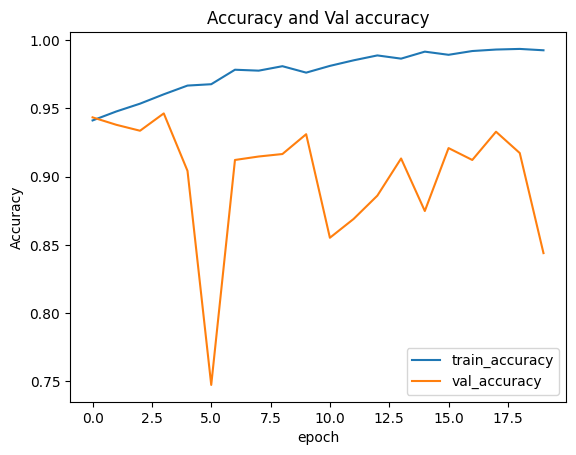

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy and Val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
lenet_model.predict(train_dataset.take(1)).shape

**MODEL EVALUATION**

In [ ]:
lenet_model.evaluate(test_dataset)

In [ ]:
lenet_model.predict(test_dataset.take(1))[0][0]

In [28]:
def logic_classify(x):
  if(x<0.5):
   return str('Pa')
  else:
   return str('Un')

1/1 [==============================] - 0s 27ms/step


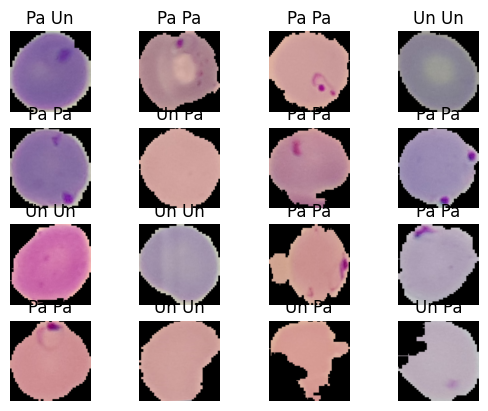

In [29]:
for i,(image,label) in enumerate(test_dataset.take(16)):
  axi = plt.subplot(4,4,i+1)
  plt.imshow(image[0])
  plt.title(str(logic_classify(label.numpy()[0])) + " " + str(logic_classify(lenet_model.predict(image)[0][0])))
  plt.axis('off')